In [1]:
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
# seaborn is of use for visualizing.
import seaborn as sns

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
os.chdir("/kaggle/input/")
print("Files in %r: %s" % (cwd, files))

# load train, test, and submission sample dataset.
train_csv = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
test_csv = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
submission = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')

Files in '/kaggle/working': ['__notebook__.ipynb']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


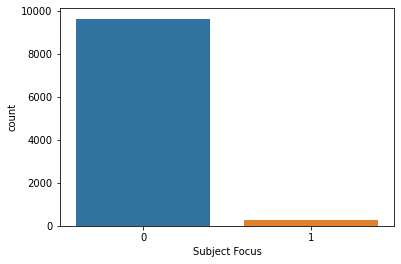

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


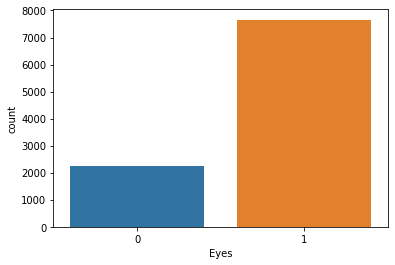

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


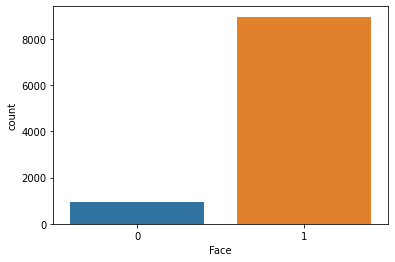

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


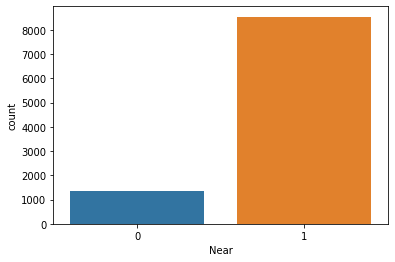

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


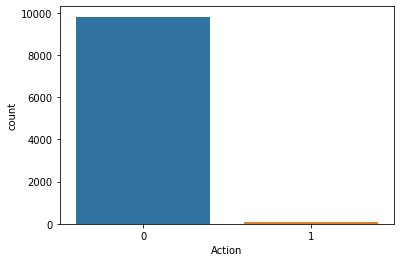

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


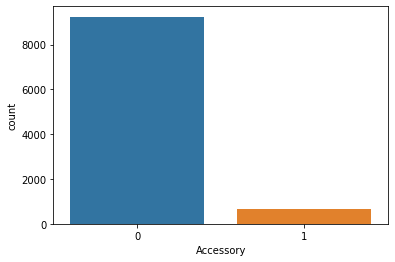

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


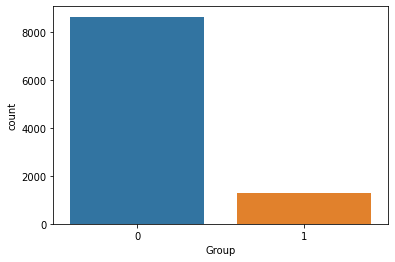

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


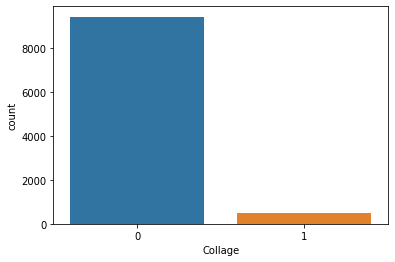

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


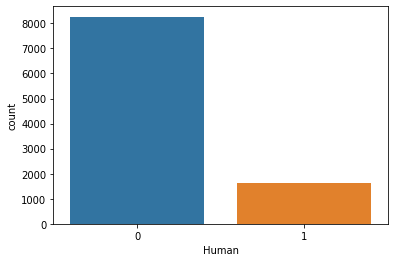

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


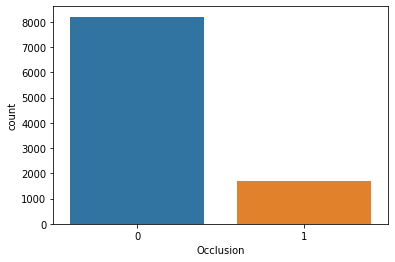

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


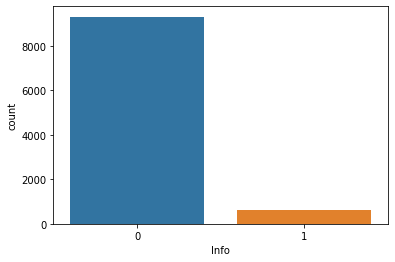

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


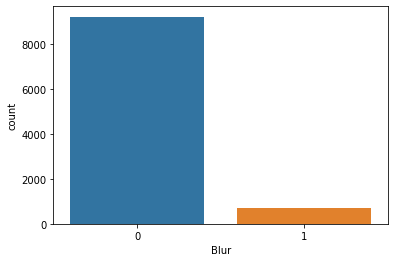

In [2]:
train_csv.drop_duplicates()
for i in train_csv.drop(['Id','Pawpularity'],axis=1):
    sns.countplot(train_csv[i])
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pawpularity', ylabel='Density'>

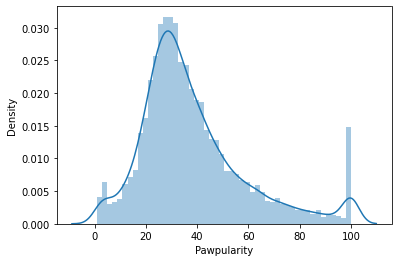

In [3]:
sns.distplot(train_csv['Pawpularity'])

In [4]:
os.chdir('../input/petfinder-pawpularity-score/train')

# We can find the size of each image data from this procedure
size_data = pd.DataFrame()
for file in os.listdir():
    imgg = cv2.imread(file)
    w,h,c = imgg.shape
    size_data=size_data.append([[w,h,c,imgg.size/3]])
size_data

,0,1,2,3
0,960,720,3,691200.0
0,720,405,3,291600.0
0,514,315,3,161910.0
0,1280,1280,3,1638400.0
0,960,720,3,691200.0
...,...,...,...,...
0,960,720,3,691200.0
0,853,1280,3,1091840.0
0,780,1040,3,811200.0
0,960,720,3,691200.0


In [5]:
size_data[size_data[3] == size_data[3].min()]

,0,1,2,3
0,120,90,3,10800.0
0,120,90,3,10800.0


In [6]:
size_data[3].value_counts()

691200.0     3595
1228800.0     811
518400.0      660
921600.0      481
1638400.0     302
             ... 
1263360.0       1
836441.0        1
370560.0        1
301774.0        1
620160.0        1
Name: 3, Length: 1730, dtype: int64

In [7]:
size_data[size_data[3] == 691200]

,0,1,2,3
0,960,720,3,691200.0
0,960,720,3,691200.0
0,960,720,3,691200.0
0,960,720,3,691200.0
0,960,720,3,691200.0
...,...,...,...,...
0,960,720,3,691200.0
0,960,720,3,691200.0
0,960,720,3,691200.0
0,960,720,3,691200.0


In [8]:
train_img = []
for i in os.listdir():
    file = cv2.imread(i)
    file=cv2.resize(file,(64,64), interpolation=cv2.INTER_AREA)
    train_img.append(file/255)
train_img[:5]

[array([[[0.81960784, 0.82745098, 0.82745098],
         [0.80784314, 0.81176471, 0.81176471],
         [0.78823529, 0.78823529, 0.78823529],
         ...,
         [0.72156863, 0.70980392, 0.69411765],
         [0.76470588, 0.74901961, 0.73333333],
         [0.79607843, 0.78039216, 0.76078431]],
 
        [[0.81176471, 0.81568627, 0.81176471],
         [0.80784314, 0.81176471, 0.80392157],
         [0.79215686, 0.79607843, 0.78823529],
         ...,
         [0.74509804, 0.73333333, 0.70588235],
         [0.77254902, 0.74901961, 0.72156863],
         [0.78823529, 0.76470588, 0.7372549 ]],
 
        [[0.80784314, 0.81176471, 0.80392157],
         [0.8       , 0.80392157, 0.79215686],
         [0.78823529, 0.79215686, 0.77647059],
         ...,
         [0.76862745, 0.74117647, 0.71372549],
         [0.77254902, 0.74117647, 0.71764706],
         [0.78823529, 0.74117647, 0.71372549]],
 
        ...,
 
        [[0.61568627, 0.48627451, 0.38039216],
         [0.58039216, 0.44705882, 0.32549

In [9]:
train_img_name = []
for i in os.listdir():
    train_img_name.append(i)
train_img_name[:5]

['7954ebb5c90d9618e34959df0ad5f062.jpg',
 '2969162fab1d0e5a65e4ce02db267745.jpg',
 '9f32ae94d7723414cb8fa881a1c6626c.jpg',
 'b8f920f44800ee71e4659dea84bc9bef.jpg',
 '7fc71b8da143721939715b1cfe22122f.jpg']

In [10]:
for name in train_img_name:
    if name[-4:] != '.jpg':
        print(name)

In [11]:
train_csv_data = pd.DataFrame()
for img, name in zip(train_img, train_img_name):
    name=name[:-4]
    location = train_csv[train_csv['Id'] == name].index[0]
    train_csv_data= train_csv_data.append([train_csv.loc[location]])
train_csv_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
4719,7954ebb5c90d9618e34959df0ad5f062,0,1,1,1,0,0,0,0,0,0,0,0,38
1625,2969162fab1d0e5a65e4ce02db267745,0,1,1,1,0,0,1,0,0,0,0,0,29
6154,9f32ae94d7723414cb8fa881a1c6626c,0,1,1,1,0,0,0,0,1,1,0,0,26
7187,b8f920f44800ee71e4659dea84bc9bef,0,1,1,1,0,0,0,1,0,0,0,0,27
4963,7fc71b8da143721939715b1cfe22122f,1,1,1,1,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,d22da16a635031c1ae7554c839f26c9b,0,0,1,1,0,0,0,0,0,0,0,0,48
3290,54ef90ca5972af9ebdb54fb5fcd67552,0,0,1,1,0,0,1,0,0,0,0,1,35
7745,c86fe58fcfb959cda493dc6578c1868c,0,1,1,1,0,0,0,0,0,0,0,0,32
2643,44293284a7b4ac2a2e4ebfa57db4c48c,0,1,1,0,0,0,0,0,0,0,0,0,84


In [12]:
train_csv_data=train_csv_data.reset_index().drop(['index'],axis=1)
train_csv_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,7954ebb5c90d9618e34959df0ad5f062,0,1,1,1,0,0,0,0,0,0,0,0,38
1,2969162fab1d0e5a65e4ce02db267745,0,1,1,1,0,0,1,0,0,0,0,0,29
2,9f32ae94d7723414cb8fa881a1c6626c,0,1,1,1,0,0,0,0,1,1,0,0,26
3,b8f920f44800ee71e4659dea84bc9bef,0,1,1,1,0,0,0,1,0,0,0,0,27
4,7fc71b8da143721939715b1cfe22122f,1,1,1,1,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,d22da16a635031c1ae7554c839f26c9b,0,0,1,1,0,0,0,0,0,0,0,0,48
9908,54ef90ca5972af9ebdb54fb5fcd67552,0,0,1,1,0,0,1,0,0,0,0,1,35
9909,c86fe58fcfb959cda493dc6578c1868c,0,1,1,1,0,0,0,0,0,0,0,0,32
9910,44293284a7b4ac2a2e4ebfa57db4c48c,0,1,1,0,0,0,0,0,0,0,0,0,84


In [13]:
os.chdir('../test')

for i in os.listdir():
    file = cv2.imread(i)
    print(file.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [14]:
test_img = []
for i in os.listdir():
    file = cv2.imread(i)
    file=cv2.resize(file,(64,64), interpolation=cv2.INTER_AREA)
    test_img.append(file/255)
test_img[:5]

[array([[[0.43529412, 0.39215686, 0.38039216],
         [0.53333333, 0.54901961, 0.40784314],
         [0.6       , 0.46666667, 0.49019608],
         ...,
         [0.6       , 0.46666667, 0.50588235],
         [0.63529412, 0.70588235, 0.61960784],
         [0.57254902, 0.35294118, 0.76862745]],
 
        [[0.50588235, 0.47058824, 0.47058824],
         [0.56470588, 0.65098039, 0.56862745],
         [0.63921569, 0.57647059, 0.63529412],
         ...,
         [0.55686275, 0.7372549 , 0.61176471],
         [0.49019608, 0.5372549 , 0.2745098 ],
         [0.58039216, 0.54117647, 0.68235294]],
 
        [[0.29411765, 0.39215686, 0.58823529],
         [0.50196078, 0.49803922, 0.48235294],
         [0.53333333, 0.3372549 , 0.47058824],
         ...,
         [0.6627451 , 0.60784314, 0.8       ],
         [0.36862745, 0.3372549 , 0.39607843],
         [0.45098039, 0.31372549, 0.53333333]],
 
        ...,
 
        [[0.61960784, 0.34901961, 0.52941176],
         [0.52156863, 0.48235294, 0.57254

In [15]:
test_img_name = []
for i in os.listdir():
    test_img_name.append(i)
test_img_name[:5]

['c978013571258ed6d4637f6e8cc9d6a3.jpg',
 '4e429cead1848a298432a0acad014c9d.jpg',
 '43a2262d7738e3d420d453815151079e.jpg',
 '8f49844c382931444e68dffbe20228f4.jpg',
 '4128bae22183829d2b5fea10effdb0c3.jpg']

In [16]:
test_csv_data = pd.DataFrame()
for img, name in zip(test_img, test_img_name):
    name=name[:-4]
    location = test_csv[test_csv['Id'] == name].index[0]
    test_csv_data= test_csv_data.append([test_csv.loc[location]])
test_csv_data=test_csv_data.reset_index().drop(['index'],axis=1)
test_csv_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
1,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
2,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
3,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
4,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
5,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
6,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1
7,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0


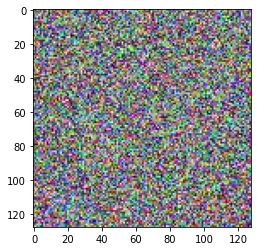

In [17]:
test_1 = cv2.imread('./'+test_csv_data['Id'][0]+'.jpg')
plt.imshow(test_1)

In [18]:
train_csv_x = train_csv_data.drop(['Id','Pawpularity'],axis=1)
train_y = train_csv_data['Pawpularity']

test_csv_x = test_csv_data.drop(['Id'],axis=1)

In [19]:
csv_input = tf.keras.Input(shape = train_csv_x.shape[1:], name = 'CSV_Input')
img_input = tf.keras.Input(shape = np.array(train_img).shape[1:], name = 'IMG_Input')

csv_hidden1 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden1')(csv_input)
csv_hidden2 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden2')(csv_hidden1)
csv_hidden3 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden3')(csv_hidden2)
csv_hidden4 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden4')(csv_hidden3)
csv_hidden5 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden5')(csv_hidden4)
csv_hidden6 = tf.keras.layers.Dense(1000, activation='elu', kernel_initializer = 'he_normal', name='CSV_Hidden6')(csv_hidden5)


img_conv1 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv1')(img_input)
img_conv2 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv2')(img_conv1)
img_pooling1 = tf.keras.layers.MaxPooling2D(4, name= 'IMG_Max1')(img_conv2)

img_conv3 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv3')(img_pooling1)
img_conv4 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv4')(img_conv3)
img_pooling2 = tf.keras.layers.MaxPooling2D(4, name= 'IMG_Max2')(img_conv4)


img_conv5 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv5')(img_pooling2)
img_conv6 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv6')(img_conv5)
img_pooling3 = tf.keras.layers.MaxPooling2D(3, name= 'IMG_Max3')(img_conv6)



img_conv7 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv7')(img_pooling3)

img_hidden1 = tf.keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal',name='IMG_hidden1' ,use_bias=False)(img_conv7)

img_hidden2 = tf.keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal',name='IMG_hidden2' ,use_bias=False)(img_hidden1)


img_gpool = tf.keras.layers.GlobalAvgPool2D(name = 'IMG_Gpool')(img_hidden2)


img_conv7 = tf.keras.layers.Conv2D(120, 4, padding = 'same', activation = 'elu', kernel_initializer = 'he_normal',name='IMG_Conv7')(img_pooling3)

img_hidden1 = tf.keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal',name='IMG_hidden1' ,use_bias=False)(img_conv7)


img_hidden2 = tf.keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal',name='IMG_hidden2' ,use_bias=False)(img_hidden1)

img_gpool = tf.keras.layers.GlobalAvgPool2D(name = 'IMG_Gpool')(img_hidden2)





csv_output = tf.keras.layers.Dense(1, name = 'CSV_Output',activation='relu')(csv_hidden6)
img_output = tf.keras.layers.Dense(1,name = 'IMG_Output',activation='relu')(img_gpool)

model = tf.keras.Model(inputs=[csv_input, img_input], outputs=[csv_output, img_output], name='Pythonash_model')

2022-01-01 00:29:29.174064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-01 00:29:29.276639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-01 00:29:29.277741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-01 00:29:29.279666: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.summary()

Model: "Pythonash_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
IMG_Input (InputLayer)          [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
IMG_Conv1 (Conv2D)              (None, 64, 64, 120)  5880        IMG_Input[0][0]                  
__________________________________________________________________________________________________
IMG_Conv2 (Conv2D)              (None, 64, 64, 120)  230520      IMG_Conv1[0][0]                  
__________________________________________________________________________________________________
IMG_Max1 (MaxPooling2D)         (None, 16, 16, 120)  0           IMG_Conv2[0][0]                  
____________________________________________________________________________________

In [21]:
learning_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate = 1e-5,
decay_steps = .02,
decay_rate = 1-(1e-5))

opt = tf.keras.optimizers.Adam(learning_rate = learning_schedule)
model.compile(loss=['mse','mse'], loss_weights=[0.5, 0.5], optimizer = opt, metrics = tf.keras.metrics.RootMeanSquaredError())

epoch_number = 10

check_1 = tf.keras.callbacks.ModelCheckpoint('/output/kaggle/workking/pythonash_model.h5', save_best_only=True, verbose=2)

In [22]:
model.fit( 
    x= [train_csv_x, np.array(train_img)], y = [train_y, train_y], epochs=epoch_number, 
    validation_split=0.2, verbose =2, workers=3, batch_size = 100, validation_batch_size = 100,
    callbacks = [check_1])

2022-01-01 00:29:33.442581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-01 00:29:35.244326: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


80/80 - 17s - loss: 1096.1925 - CSV_Output_loss: 736.7224 - IMG_Output_loss: 1455.6622 - CSV_Output_root_mean_squared_error: 27.1426 - IMG_Output_root_mean_squared_error: 38.1531 - val_loss: 607.7699 - val_CSV_Output_loss: 474.7825 - val_IMG_Output_loss: 740.7575 - val_CSV_Output_root_mean_squared_error: 21.7895 - val_IMG_Output_root_mean_squared_error: 27.2169

Epoch 00001: val_loss improved from inf to 607.76990, saving model to /output/kaggle/workking/pythonash_model.h5
Epoch 2/10
80/80 - 8s - loss: 459.9120 - CSV_Output_loss: 457.9817 - IMG_Output_loss: 461.8421 - CSV_Output_root_mean_squared_error: 21.4005 - IMG_Output_root_mean_squared_error: 21.4905 - val_loss: 446.5511 - val_CSV_Output_loss: 454.3857 - val_IMG_Output_loss: 438.7164 - val_CSV_Output_root_mean_squared_error: 21.3163 - val_IMG_Output_root_mean_squared_error: 20.9456

Epoch 00002: val_loss improved from 607.76990 to 446.55115, saving model to /output/kaggle/workking/pythonash_model.h5
Epoch 3/10
80/80 - 8s - loss: 

In [23]:
best_model = tf.keras.models.load_model('/output/kaggle/workking/pythonash_model.h5')
csv_result, img_result = best_model.predict([test_csv_x, np.array(test_img)])
final_result = pd.DataFrame(0.5 * csv_result + 0.5 * img_result)
final_result.columns =['Pawpularity']
final_result

,Pawpularity
0,30.867569
1,39.212402
2,34.738464
3,36.683525
4,38.418404
5,32.251774
6,33.771515
7,40.992115


In [24]:
csv_result, img_result = model.predict([test_csv_x, np.array(test_img)])
final_result = pd.DataFrame(0.5 * csv_result + 0.5 * img_result)
final_result.columns =['Pawpularity']
final_result

,Pawpularity
0,30.978195
1,38.876007
2,34.737213
3,36.327053
4,38.262714
5,32.039803
6,33.724586
7,40.425972


In [25]:
final_result.to_csv('/kaggle/working/outcome.csv',index=False) # save to notebook output
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
os.chdir("/kaggle/working/")
print("Files in %r: %s" % (cwd, files))


Files in '/kaggle/input/petfinder-pawpularity-score/test': ['c978013571258ed6d4637f6e8cc9d6a3.jpg', '4e429cead1848a298432a0acad014c9d.jpg', '43a2262d7738e3d420d453815151079e.jpg', '8f49844c382931444e68dffbe20228f4.jpg', '4128bae22183829d2b5fea10effdb0c3.jpg', '80bc3ccafcc51b66303c2c263aa38486.jpg', 'e0de453c1bffc20c22b072b34b54e50f.jpg', 'b03f7041962238a7c9d6537e22f9b017.jpg']
